In [2]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import davies_bouldin_score


In [4]:
customers = pd.read_csv('Customers.csv')
transactions = pd.read_csv('Transactions.csv')

In [5]:
merged_data = pd.merge(transactions, customers, on='CustomerID')

In [6]:
customer_features = merged_data.groupby('CustomerID').agg({'TotalValue': 'sum',}).reset_index()


In [7]:
customer_features['SignupYear'] = pd.to_datetime(customers['SignupDate']).dt.year


In [8]:
customer_features.head()

,CustomerID,TotalValue,SignupYear
0,C0001,3354.52,2022
1,C0002,1862.74,2022
2,C0003,2725.38,2024
3,C0004,5354.88,2022
4,C0005,2034.24,2022


In [10]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_features[['TotalValue' , 'SignupYear']])


In [11]:
kmeans = KMeans(n_clusters=4, random_state=42)
customer_features['Cluster'] = kmeans.fit_predict(scaled_features)

C:\Users\rhak1\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [12]:
db_index = davies_bouldin_score(scaled_features, customer_features['Cluster'])
print(f'Davies-Bouldin Index: {db_index}')

Davies-Bouldin Index: 0.790521863141646


In [13]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_features)

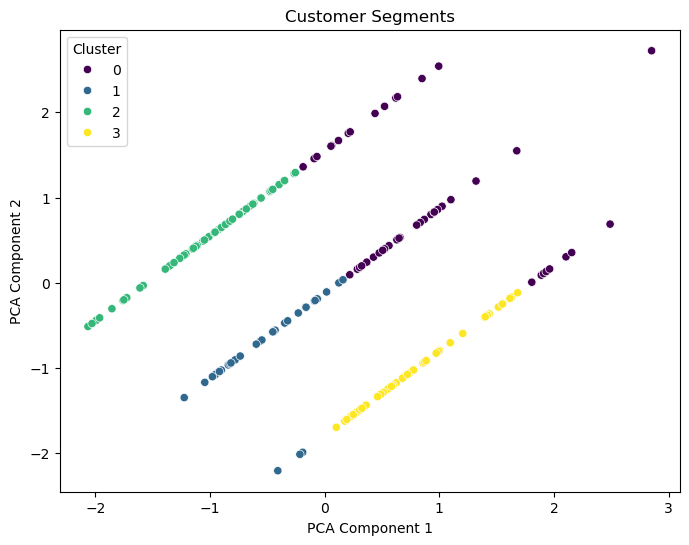

In [14]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1], hue=customer_features['Cluster'], palette='viridis')
plt.title('Customer Segments')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

In [16]:
customer_features.to_csv('Harish_Karthik_Clustering.csv', index=False)